In [11]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import csv
import pandas as pd
import os
import time

In [12]:
#loading the annotation csv
root_folder = "./data/"
data = pd.read_csv(root_folder+"allAnnotations.csv", sep=";")
data[:5]

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,"Occluded,On another road",Origin file,Origin frame number,Origin track,Origin track frame number
0,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,862,104,916,158,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2667,stop_1330545910.avi,2
1,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimitUrdbl,425,197,438,213,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2667,stop_1330545910.avi,2
2,aiua120214-0/frameAnnotations-DataLog02142012_...,stop,922,88,982,148,"1,0",aiua120214-0/DataLog02142012_external_camera.avi,2672,stop_1330545910.avi,7
3,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimit25,447,193,461,210,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2672,stop_1330545910.avi,7
4,aiua120214-0/frameAnnotations-DataLog02142012_...,speedLimit25,469,189,483,207,"0,0",aiua120214-0/DataLog02142012_external_camera.avi,2677,stop_1330545910.avi,12


In [13]:
def extract_imgs(data):
    """extract the traffic signs portion from the pictures
    Given a dictionary of filename and location, the function crop the traffic sign and 
    returns a dictionary of traffic signs and its amount
    
    Args:
    a dictionaries of filename and traffic sign location inside the image
    
    Returns:
    A dictionary of traffic signs and its amount
    """
    filenames = data["Filename"]
    folder_path = "./data/"
    output_path = "./output/"
    upl_x = "Upper left corner X"
    upl_y = "Upper left corner Y"
    lrc_x = "Lower right corner X"
    lrc_y = "Lower right corner Y"
    
    ret = {}
    
    for i in range(len(filenames)):
        #loading image
        filename = data["Filename"][i]
        img = cv2.imread(folder_path+filename)
        if img is None:
            break
        #getting x y and crop image
        x,y,x1,y1 = data[upl_x][i], data[upl_y][i], data[lrc_x][i], data[lrc_y][i]
        w, h = x1 - x, y1 - y
        img = img[y:y+h, x:x+h]
        tag = data["Annotation tag"][i]
        if tag not in ret:
            ret[tag] = 1
        else:
            ret[tag] += 1
        save_img = cv2.resize(img, (32,32))
        cv2.imwrite(output_path + tag + str(ret[tag]) + ".png", save_img)
        if i % 50 == 0:
            time.sleep(2)
            
    return ret


In [14]:
def bar_graph(dic):
    """
    plots the dictionary class and its counts
    
    Args:
    a dictionary of traffic signs
    
    Retruns:
    none
    """
    plt.bar(range(len(dic)), dic.values(), align='center')
#     plt.xticks(range(len(dic)), range(len(dic)),rotation='vertical')
    plt.xlabel("class")
    plt.ylabel("counts")
    plt.savefig('img_dist.png')
    plt.show()
   

In [15]:
img_dist = extract_imgs(data)

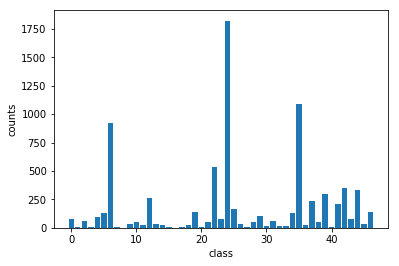

In [16]:
bar_graph(img_dist)

In [17]:
import json
def dump_json(img_dist):
    """saves the json file indicating number of signs
    
    Args:
    dictionary to save into json
    
    Returns:
    none
    """
    with open('result.json', 'w') as fp:
        json.dump(img_dist, fp)
        
def load_json():
    """loads the json file indicating number of signs
    
    Args:
    None
    
    Returns:
    dictionary loaded from result.json
    """
    with open('result.json') as data_file:    
        data = json.load(data_file)
    return data

In [86]:
# the data was very bias towards stop sign and pedestrian corssing, also signahead sign.
# need data augmentation:
# rotation
# translation
# flip
# zoom
# note : remember to update the dictionary



In [87]:
def plot_image(img):
    plt.imshow(img)
    plt.axis("off")

In [88]:
# def function to return training, validation, and testing set  60 20 20
import glob
import random
import re
def get_data():
    images_path = glob.glob("./output/*.png")
    random.shuffle(images_path)
    n = len(images_path)
    data = np.zeros(shape=(n,32,32,3))
    labels = []
    idx = 0
    while images_path:
        #get the image file name without the root folder
        image_path = images_path.pop()
        image_name = image_path.split("/")[2]
        
        #get the sign name (label)
        r = re.compile("([a-zA-Z]+)([0-9]+)")
        m = r.match(image_name)
        label = m.group(1)
    
        image = cv2.imread(image_path)
        
        data[idx,:,:,:] = image
        labels.append(label)
        idx += 1
    labels = np.array(labels)
    return data, labels

def get_class_data(classnames):
    data, labels = get_data()
    indexes = [i for i,x in enumerate(labels) if x in classnames]
    return data[indexes], labels[indexes]

max_classes = sorted(img_dist, key=img_dist.get, reverse=True)[:3]
data, labels = get_class_data(max_classes)


/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


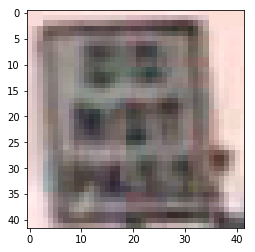

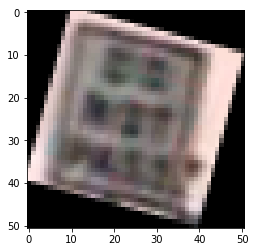

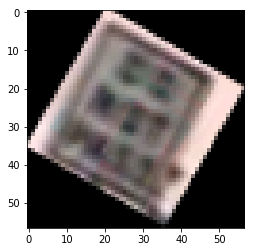

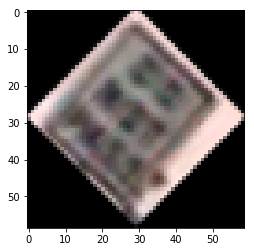

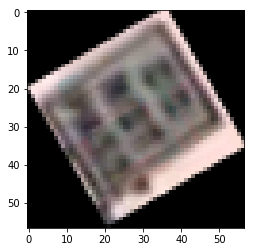

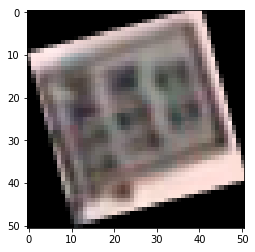

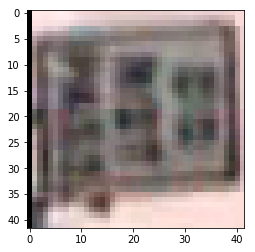

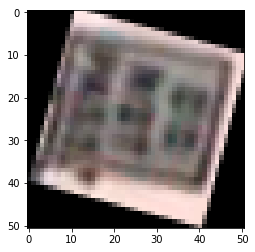

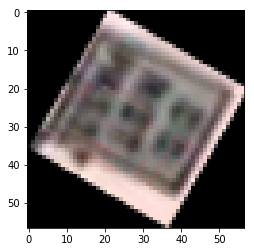

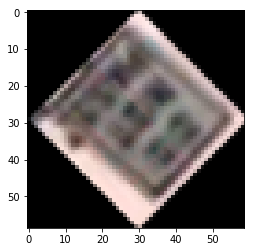

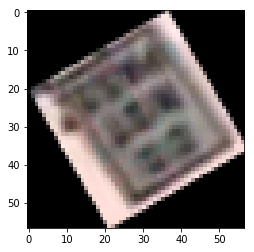

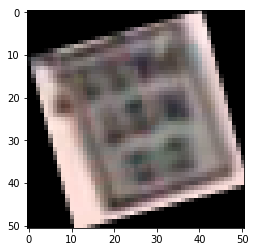

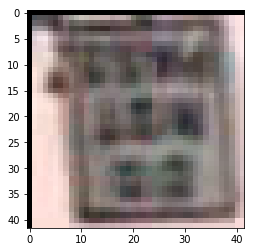

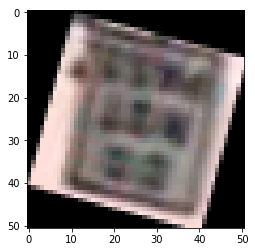

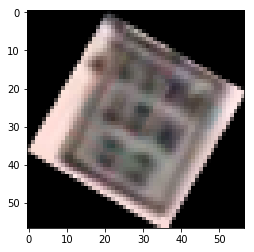

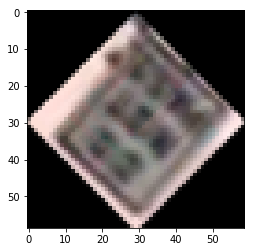

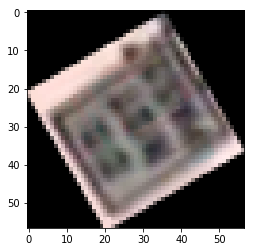

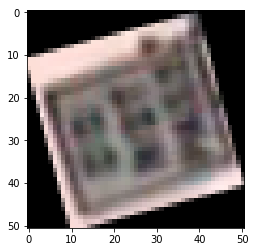

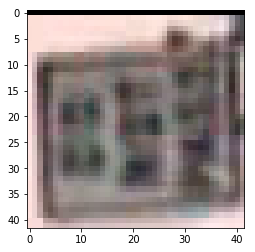

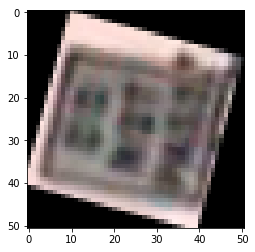

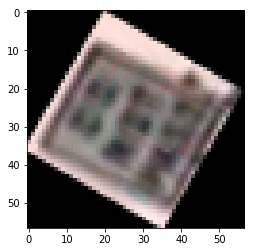

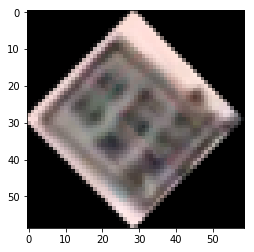

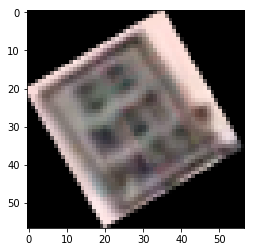

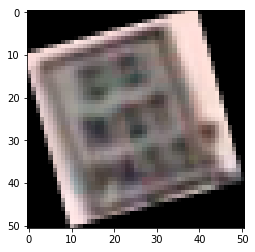

In [9]:
import imutils
image = cv2.imread("./output/doNotPass5_6938.png")
for angle in np.arange(0, 360, 15):
    rotated = imutils.rotate_bound(image, angle)
    plt.figure()
    plt.imshow(rotated)

In [2]:
#http://scikit-image.org/docs/dev/api/skimage.transform.html
from skimage import transform as trans
img2 = trans.AffineTransform(rotation = 90.)
plt.imshow(img2)

NameError: name 'plt' is not defined